# **Assignment 4**
## **CS156** | **Prof. Sterne**
### Anirudh Nair

Link to assignment: https://colab.research.google.com/drive/1LyO8SpGzwzgX7Ynjzha09p68FuaLa_Z5

## Part 1: Loading the data and cleaning it

In [ ]:
#importing the required libraries
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import time
from sklearn import svm
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_predict

In [ ]:
#downloading the datasets from the mnist dataset and loading them into x and y datasets
mnist = fetch_openml('mnist_784', version=1, cache=True)
x = mnist["data"]
y = mnist["target"]
x.shape

(70000, 784)

In [ ]:
#splitting the data for training and testing with proper propotions
x_train = x[2000:10000]
x_test = x[:2000]
y_train = y[2000:10000]
y_test = y[:2000]

In [ ]:
#customizing the dataset to only include the digits we are aiming to qualify
train_locations = np.where(np.logical_or(y_train == '5' , y_train == '8' ))
xtrain = x_train[train_locations] #Slicing Training Set 
ytrain = y_train[train_locations] #Slicing Test Set

test_locations = np.where(np.logical_or(y_test == '5' , y_test == '8' ))
xtest = x_test[test_locations]
ytest = y_test[test_locations]

In [ ]:
#checking the propotion of testing and training data
print("Lenghths of the training set data:", len(xtrain), "," ,len(ytrain))
print("Length of testing set data", len(xtest), "," ,len(ytest))
print("Test set proportion: ", float(len(xtest))/(len(xtrain)+len(xtest)))

Lenghths of the training set data: 1455 , 1455
Length of testing set data 352 , 352
Test set proportion:  0.19479800774764802


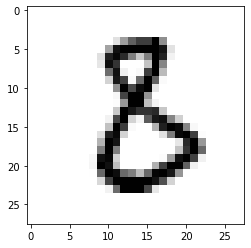

In [ ]:
#plotting the image
digit1 = xtest[100]
digit1_plot = digit1.reshape(28, 28)

plt.imshow(digit1_plot, cmap = matplotlib.cm.binary, interpolation = "nearest")
plt.axis("on")
plt.show()

In [ ]:
#checking the propotions of 5s and 8s in the dataset to prevent biasing
fives = (ytrain == '5').sum() + (ytest == '5').sum()
eights = (ytrain == '8').sum() + (ytest == '8').sum()
print(fives/eights)

0.9141949152542372


# Part 2: Training the Classifier

In [ ]:
for i in [0.1, 1, 10]:
    clf = svm.SVC(kernel='linear', C=i) 
    initial = time.time()
    clf.fit(xtrain, ytrain)
    final = time.time()
    print("Training time for linear kernel when C =", i ,":", '%.2f'%(final - initial), "sec")  

    #error rate
    pred = clf.predict(xtest)
    err_rate = 1 - accuracy_score(ytest, pred)
    print("Error rate for linear kernel when C =", i ,"is", err_rate)

Training time for linear kernel when C = 0.1 : 0.46 sec
Error rate for linear kernel when C = 0.1 is 0.051136363636363646
Training time for linear kernel when C = 1 : 0.44 sec
Error rate for linear kernel when C = 1 is 0.051136363636363646
Training time for linear kernel when C = 10 : 0.45 sec
Error rate for linear kernel when C = 10 is 0.051136363636363646


In [ ]:
# Defining a function to train a support vector classifier for different kernels and values of regularization and gamma and displaying the metrics for each classifier trained
def predict_svc(kernel_type,C=1, gamma=None,degree=None):
    print((kernel_type),"kernel")
    if kernel_type != 'linear':
        print("Parameters: C = ",(C)," gamma = ",(gamma)," degree = ",(degree))
    else:
      print("Regularization Parameter = ", (C) )


    start = time.time()
    # Setting the regularization parameter
    C = C 
    # Running the model and fitting the xtrain and ytrain values into the model
    if kernel_type == 'linear':
        clf = svm.SVC(kernel=kernel_type, C=C) 
    if kernel_type == 'rbf':
        clf = svm.SVC(kernel=kernel_type, C=C, gamma=gamma)
    if kernel_type == 'poly':
        clf = svm.SVC(kernel=kernel_type, C=C, degree=degree)
    clf.fit(xtrain,ytrain) 
    end = time.time()
    print("Training time = ", (end-start))

    # Running the model on the testing set to report accuracy 
    y_pred = clf.predict(xtest)
    accuracy = accuracy_score(ytest,y_pred)
    error_rate = 1-accuracy
    print("Accuracy Score :",(accuracy))
    print("Error Rate: ", (error_rate))
    print (".................................................................................")

In [ ]:
C_range = [0.1, 1, 10]
results_linear = []
for C in C_range:
    predict_svc('linear', C=C) 


linear kernel
Regularization Parameter =  0.1
Training time =  0.4531862735748291
Accuracy Score : 0.9488636363636364
Error Rate:  0.051136363636363646
.................................................................................
linear kernel
Regularization Parameter =  1
Training time =  0.439464807510376
Accuracy Score : 0.9488636363636364
Error Rate:  0.051136363636363646
.................................................................................
linear kernel
Regularization Parameter =  10
Training time =  0.43898630142211914
Accuracy Score : 0.9488636363636364
Error Rate:  0.051136363636363646
.................................................................................


We can see that we obtain a pretty decent accuracy score just by using a linear kernel. The classifier is able to classify 94% or the data accurately. Also, changing the regularization parameter (specifying how miss-classifications are allowed) doesn't have much of an impact on the accuracy score.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

degrees = [2,3,4,5,7,15,50]
results_polys = []
for degree in degrees:
    for C in [0.01,1,10]:
        predict_svc('poly', C=C, degree = degree) 

poly kernel
Parameters: C =  0.01  gamma =  None  degree =  2
Training time =  0.4945211410522461
Accuracy Score : 0.9886363636363636
Error Rate:  0.011363636363636354
.................................................................................
poly kernel
Parameters: C =  1  gamma =  None  degree =  2
Training time =  0.4910752773284912
Accuracy Score : 0.9886363636363636
Error Rate:  0.011363636363636354
.................................................................................
poly kernel
Parameters: C =  10  gamma =  None  degree =  2
Training time =  0.4934709072113037
Accuracy Score : 0.9886363636363636
Error Rate:  0.011363636363636354
.................................................................................
poly kernel
Parameters: C =  0.01  gamma =  None  degree =  3
Training time =  0.5241835117340088
Accuracy Score : 0.9857954545454546
Error Rate:  0.014204545454545414
.................................................................................
poly 

Through the results above, we can see that the best classification accuracy is achieved when we usa a polynomial kernel with a low degree. Hence, increasing the complexity of our classifier in this case yielded us with better results.  However, the model accuracy drops as the degree is increased, with very low accuracy levels at degrees greater than 15. 

In [ ]:
""" RBF KERNEL """
results_rbfs = []
for gamma in [0.001,0.1,1,10,100,'auto']:
    for C in [0.01,1,10]:
        predict_svc('rbf',C=C,gamma=gamma) 
        

rbf kernel
Parameters: C =  0.01  gamma =  0.001  degree =  None
Training time =  2.610102653503418
Accuracy Score : 0.48863636363636365
Error Rate:  0.5113636363636364
.................................................................................
rbf kernel
Parameters: C =  1  gamma =  0.001  degree =  None
Training time =  2.6051716804504395
Accuracy Score : 0.48863636363636365
Error Rate:  0.5113636363636364
.................................................................................
rbf kernel
Parameters: C =  10  gamma =  0.001  degree =  None
Training time =  2.5894010066986084
Accuracy Score : 0.48863636363636365
Error Rate:  0.5113636363636364
.................................................................................
rbf kernel
Parameters: C =  0.01  gamma =  0.1  degree =  None
Training time =  2.5965514183044434
Accuracy Score : 0.48863636363636365
Error Rate:  0.5113636363636364
.................................................................................


However, in the case of Radial Basis Function kernel, we see that sometimes increasing the complexity can result in lower accuracy levels as rbf kernel performs poorly for every defined parameters. This is because the data can only be seperated best at a certain dimension and taking it to other dimension will not have any affect on the classification. 